In [5]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)

red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

%matplotlib inline

In [6]:
import json
footprint_dictionary = json.load(open("k2-footprint.json.txt"))

<ipython-input-7-91b1c64b4b7b>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  pl.savefig("/Users/tgordon/Desktop/map.pdf", rasterize=True)


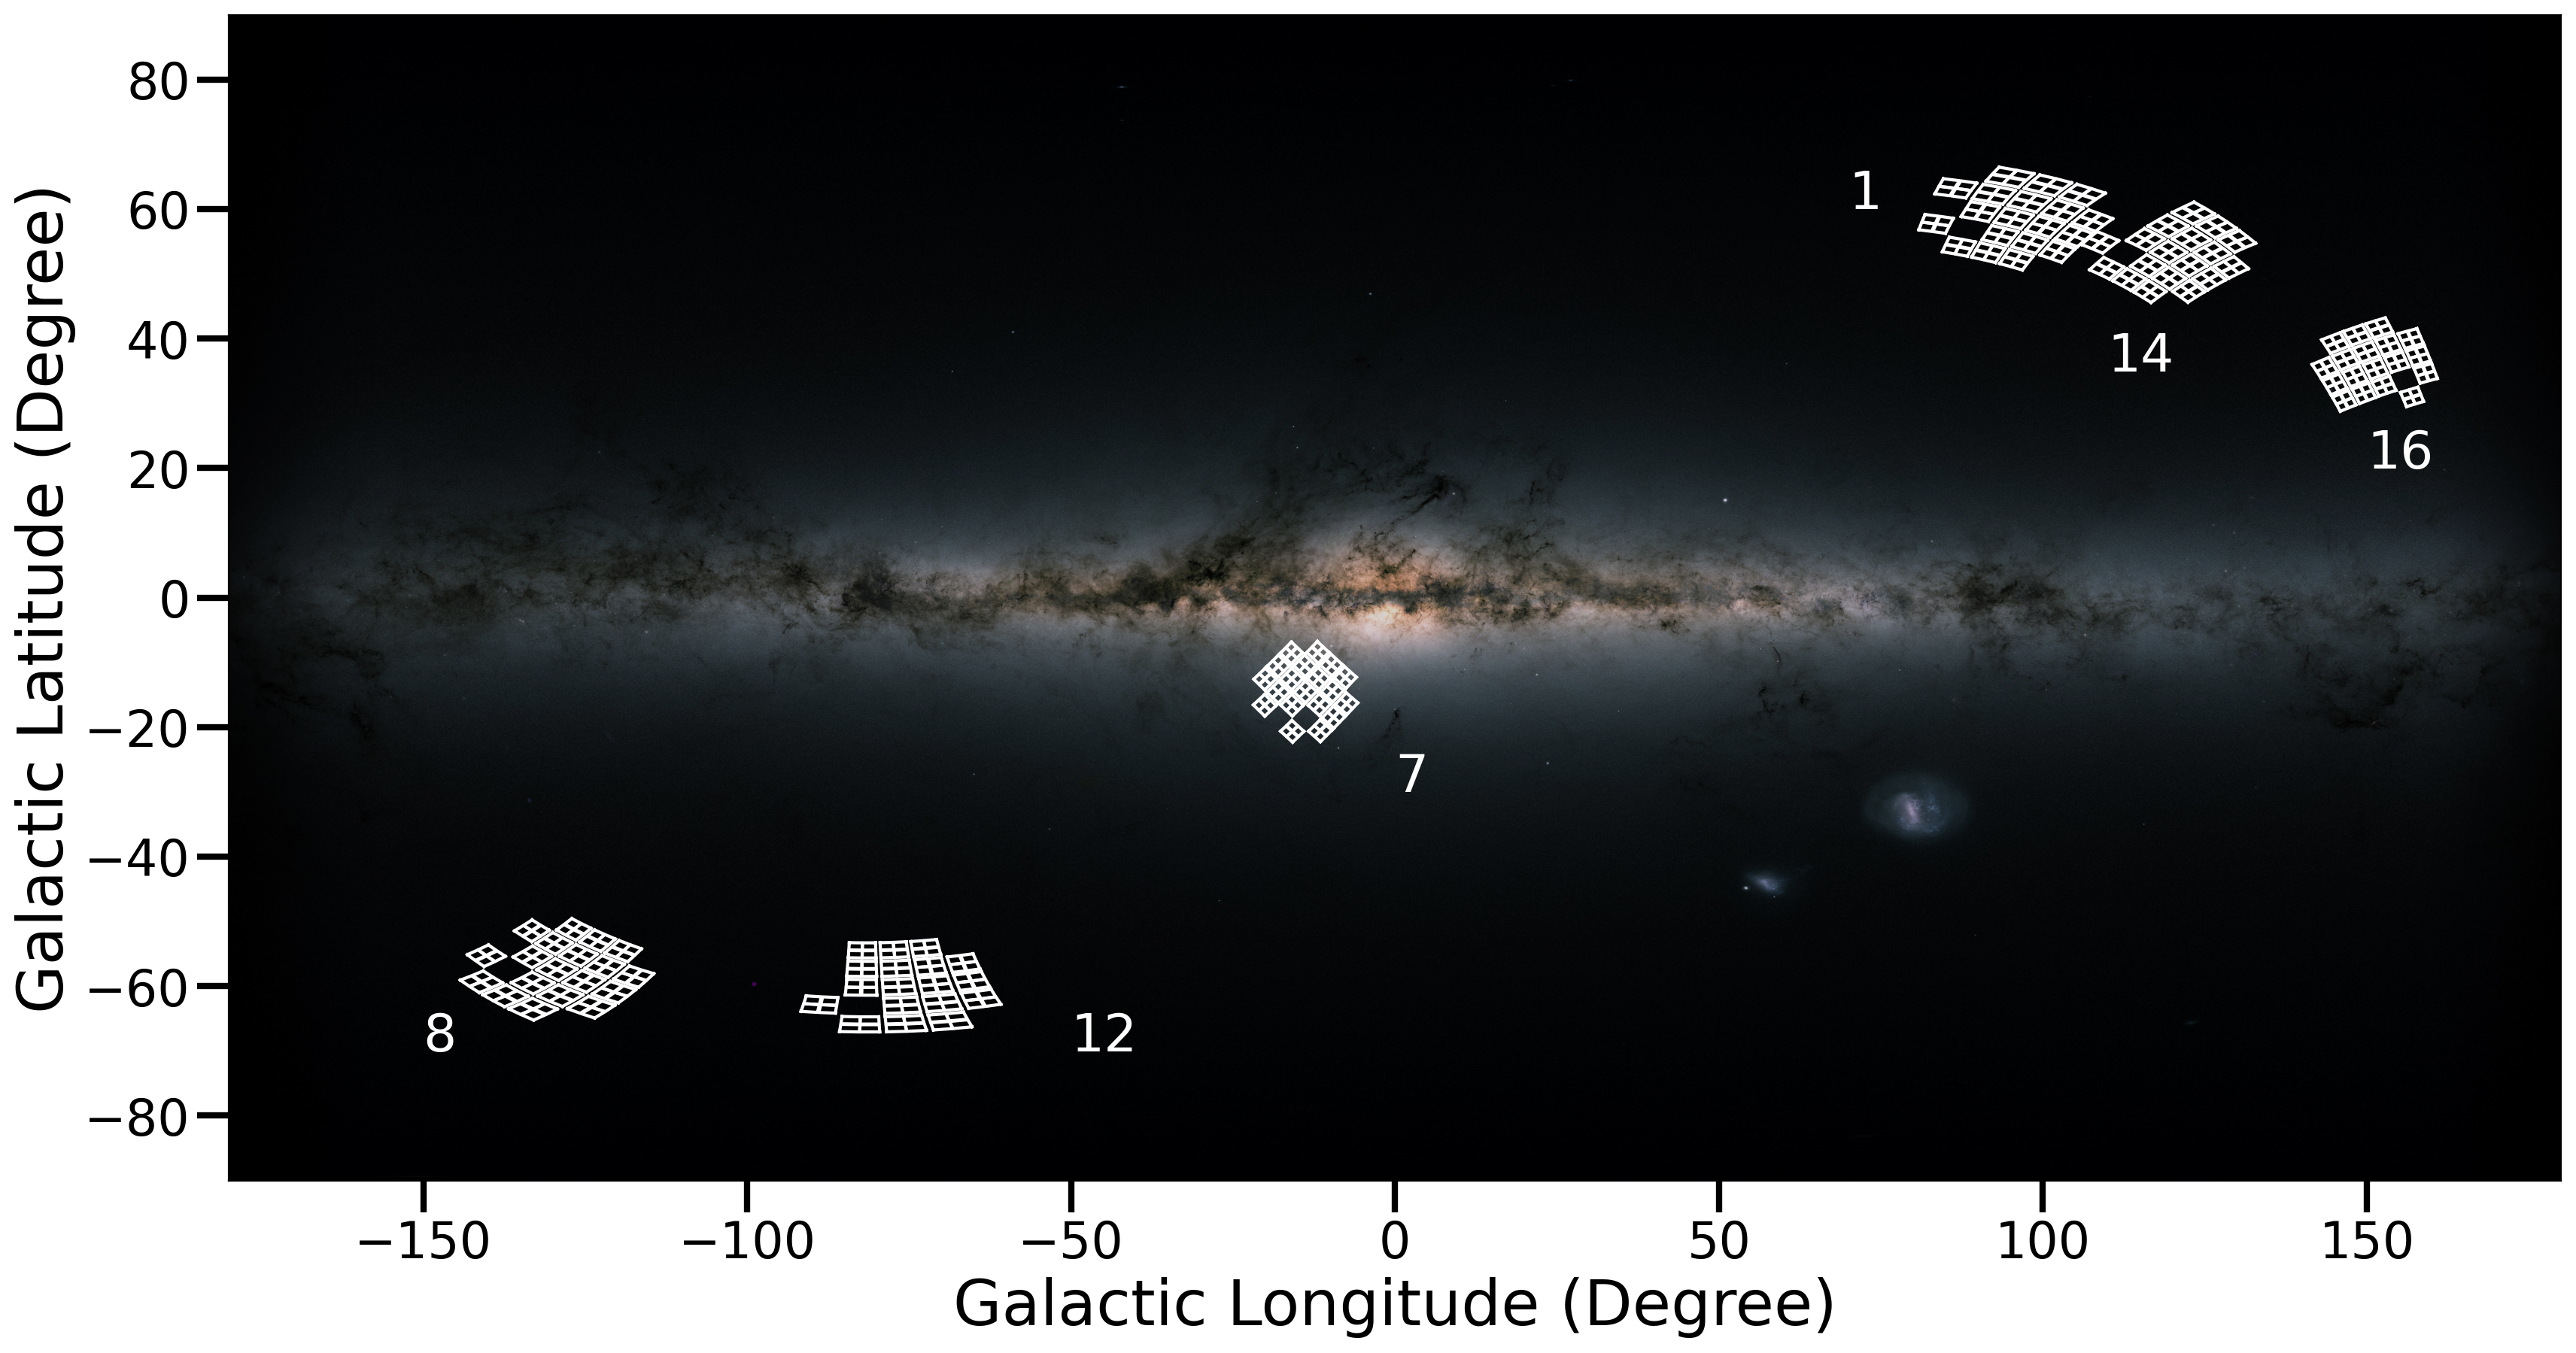

In [7]:
from mw_plot import MWSkyMap

import numpy as np
from astropy import units as  u
import astropy.coordinates as apycoords
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as pl

# setup a MWSkyMap instance
plot_instance = MWSkyMap(projection='equirectangular', center=(0, 0)*u.deg, radius=(180, 90)*u.deg)
plot_instance.mw_scatter(1*u.deg, 1*u.deg, 1)

ax = plot_instance.ax
#campaigns = list(footprint_dictionary.keys())
campaigns = ['c1', 'c7', 'c8', 'c12', 'c14', 'c16']
for campaign in campaigns:
    lon = []
    for i, chan in footprint_dictionary["{0}".format(campaign)]["channels"].items():
        lon = np.array([l if l < 180 else l - 360 for l in chan["corners_glon"]])
        lon = np.append(lon, lon[0])
        lat = np.append(chan["corners_glat"], chan["corners_glat"][0])
        if all(-lon > -179) & all(-lon < 179):
            ax.plot(-lon, lat, 'w', zorder=10)
ax.annotate('7', xy=(0, -30), xycoords='data', fontsize=25, zorder=9, color='w')
ax.annotate('12', xy=(-50, -70), xycoords='data', fontsize=25, zorder=9, color='w')
ax.annotate('8', xy=(-150, -70), xycoords='data', fontsize=25, zorder=9, color='w')
ax.annotate('16', xy=(150, 20), xycoords='data', fontsize=25, zorder=9, color='w')
ax.annotate('14', xy=(110, 35), xycoords='data', fontsize=25, zorder=9, color='w')
ax.annotate('1', xy=(70, 60), xycoords='data', fontsize=25, zorder=9, color='w')

pl.savefig("/Users/tgordon/Desktop/map.pdf", rasterize=True)